## Replicating Goyal and Welch (2008, RFS)

This Notebook replicates the annual analyses in Goyal and Welch (2008, RFS).

In [12]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import matplotlib.pyplot as plt

from pandas.tseries.offsets import MonthEnd

%matplotlib inline

#### Step 1: Get the data

The PredictorData.xls file can be downloaded from Amit Goyal's website:


https://docs.google.com/spreadsheets/d/1bM7vCWd3WOt95Sf9qjLPZjoiafgF_8EG/edit?gid=407859737#gid=407859737$

#### Step 2: Import the data

In [13]:
xls_path = 'PredictorData.xls'

goyal = pd.ExcelFile(xls_path)
df = {sheet_name: goyal.parse(sheet_name) for sheet_name in goyal.sheet_names}

#### Step 3: Data preprocessing

In [14]:
# create date index for monthly data
df['Monthly']['yyyymm'] = pd.to_datetime(df['Monthly']['yyyymm'].astype(str), format='%Y%m')
df['Monthly'].set_index('yyyymm', inplace=True)
df['Monthly'].index = df['Monthly'].index.to_period('M').to_timestamp('M')


# create date index for annual data
df['Annual']['yyyy'] = pd.to_datetime(df['Annual']['yyyy'].astype(str), format='%Y')
df['Annual'].set_index('yyyy', inplace=True)
df['Annual'].index = df['Annual'].index.to_period('Y').to_timestamp('Y')

df = df['Annual']

df.head()

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,cay,ntis,Rfree,infl,eqis,ltr,corpr,svar,csp,ik,CRSP_SPvw,CRSP_SPvwx
yyyy,,,,,,,,,,,,,,,,,,,,
1871-12-31,4.74,0.26,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1872-12-31,5.07,0.30,0.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1873-12-31,4.42,0.33,0.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1874-12-31,4.54,0.33,0.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1875-12-31,4.37,0.30,0.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Step 4: Data Exploration

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


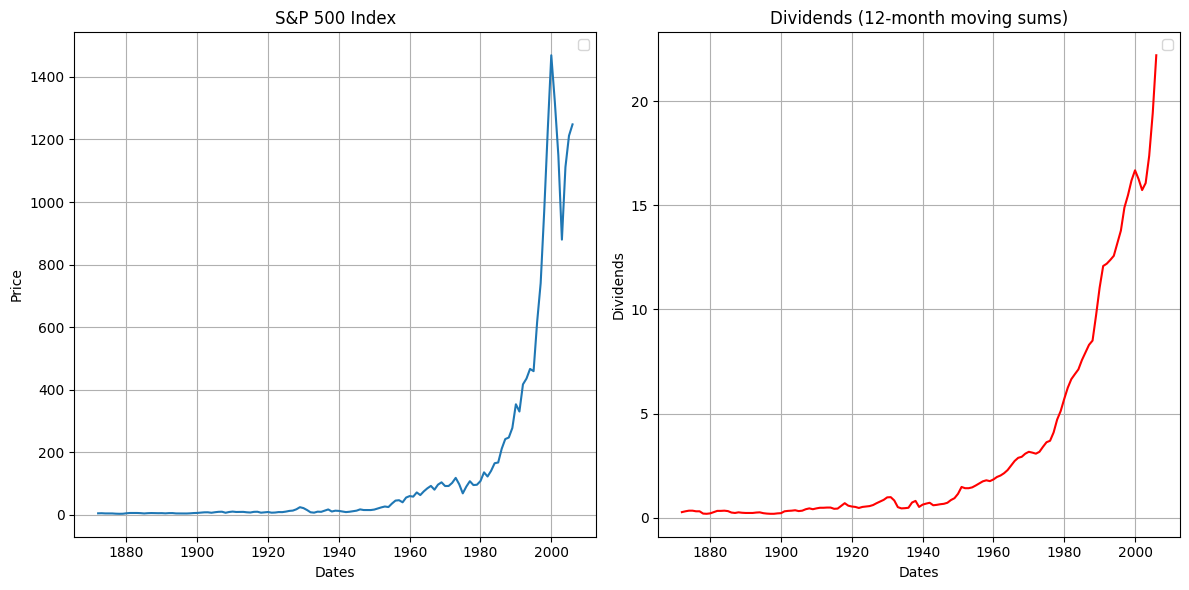

In [15]:
# Create a figure with two subfigures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot on the first subfigure
ax1.plot(df.index, df['Index'])
ax1.set_title('S&P 500 Index')
ax1.set_xlabel('Dates')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)

# Plot on the second subfigure
ax2.plot(df.index, df['D12'], color='r')
ax2.set_title('Dividends (12-month moving sums)')
ax2.set_xlabel('Dates')
ax2.set_ylabel('Dividends')
ax2.legend()
ax2.grid(True)

# Adjust layout to prevent overlap
fig.tight_layout()

# Display the plot
plt.show()

#### Step 5: Data Preparation

In [16]:
# Dividend Price Ratio (d/p) is the difference between the log of dividends and the log of prices.
df['d/p'] = np.log(df['D12']) - np.log(df['Index'])

# Dividend Yield (d/y) is the difference between the log of dividends and the log of lagged prices.
df['d/y'] = np.log(df['D12'])- np.log(df['Index'].shift(1))

# Earnings Price Ratio (e/p) is the difference between the log of earnings and the log of prices.
df['e/p'] = np.log(df['E12']) - np.log(df['Index'])

# Dividend Payout Ratio (d/e) is the difference between the log of dividends and the log of earnings.
df['d/e'] = np.log(df['D12']) - np.log(df['E12'])

# Term Spread (tms) is the difference between the long term yield on government bonds and the T-bill.
df['tms'] = df['lty'] - df['tbl']

# Default Yield Spread (dfy): is the difference between BAA- and AAA- rated corporate bond yields.
df['dfy'] = df['BAA'] - df['AAA']

# Default Return Spread (dfr): is the difference between the return on long-term corporate bonds and returns on the long-term government bonds.
df['dfr'] = df['corpr'] - df['ltr']

# Calculate Index Price plus Dividends
df['IndexDiv'] = df['Index'] + df['D12']

# Calculate logretdiv (log return with dividends)
df['logretdiv'] = np.log(df['IndexDiv'] / df['Index'].shift(1))

# Calculate logRfree
df['logRfree'] = np.log(df['Rfree'] + 1)

# equity premium, i.e., the total rate of return on the stock market minus the prevailing short-term interest rate.
df['premium'] = df['logretdiv'] - df['logRfree']

df = df.drop(columns=['Index', 'csp', 'D12', 'E12', 'AAA', 'BAA', 'CRSP_SPvwx', 'corpr','Rfree', 'CRSP_SPvw'])

df.head()

,b/m,tbl,lty,cay,ntis,infl,eqis,ltr,svar,ik,...,d/y,e/p,d/e,tms,dfy,dfr,IndexDiv,logretdiv,logRfree,premium
yyyy,,,,,,,,,,,,,,,,,,,,,
1871-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-2.472328,-0.430783,NaN,NaN,NaN,5.00,NaN,0.055753,NaN
1872-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.760010,-2.467311,-0.360003,NaN,NaN,NaN,5.37,0.124791,0.069432,0.055359
1873-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.732003,-2.262668,-0.332134,NaN,NaN,NaN,4.75,-0.065196,0.083071,-0.148267
1874-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.594802,-2.289456,-0.332134,NaN,NaN,NaN,4.87,0.096954,0.047403,0.049551
1875-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.716900,-2.496414,-0.182322,NaN,NaN,NaN,4.67,0.028232,0.042877,-0.014645


#### Step 6: Defining the model, etc. 

I.e. replicating the analysis performed in Goyal and Welch (2008, RFS).

In [17]:
def get_statistics(ts_df, indep, dep, h=1, start='1872-12-31', end='2004-12-31', est_periods_OOS=20):

    #### IS ANALYSIS

    # 1. Historical mean model
    avg = ts_df.loc[start:end, dep].mean()
    IS_error_N = ts_df.loc[start:end, dep] - avg

    # 2. OLS model
    ts_df['lag_indep'] = ts_df[indep].shift(1)
    reg = sm.OLS(ts_df.loc[start:end, dep], sm.add_constant(ts_df.loc[start:end, 'lag_indep'])).fit()
    IS_error_A = reg.resid

    #### OOS ANALYSIS
    OOS_error_N = np.zeros(len(ts_df.loc[start:end]) - est_periods_OOS)
    OOS_error_A = np.zeros(len(ts_df.loc[start:end]) - est_periods_OOS)

    date_index = pd.to_datetime(ts_df.index)
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)

    j = 0

    for current_date in date_index[(date_index >= start_date + pd.DateOffset(years=est_periods_OOS)) & (date_index < end_date)]:

        next_date = current_date + pd.DateOffset(years=1) + MonthEnd(0)
        actual_ERP = ts_df.loc[next_date, dep]

        # 1. Historical mean model
        historical_data = ts_df.loc[start:current_date, dep]
        OOS_error_N[j - 1] = actual_ERP - historical_data.mean()

        # 2. OLS model
        reg_OOS = sm.OLS(ts_df.loc[start:current_date, dep],
                         sm.add_constant(ts_df.loc[start:current_date,
                                         'lag_indep'])).fit()
        # Prepare the prediction DataFrame
        indep_values = ts_df.loc[[current_date], [indep]]
        indep_values = sm.add_constant(indep_values, has_constant='add')

        pred_ERP = reg_OOS.predict(indep_values)
        OOS_error_A[j - 1] = pred_ERP - actual_ERP

        j += 1
        if j>=len(OOS_error_N):
            break

    # Compute statistics
    MSE_N = np.mean(OOS_error_N**2)
    MSE_A = np.mean(OOS_error_A**2)
    T = len(ts_df[dep].dropna())
    OOS_R2 = 1 - MSE_A / MSE_N
    OOS_oR2 = OOS_R2 - (1 - OOS_R2) * (reg.df_resid / (T - 1))
    dRMSE = np.sqrt(MSE_N) - np.sqrt(MSE_A)

    #### CREATE PLOT
    IS = np.cumsum(IS_error_N[0:]**2) - np.cumsum(IS_error_A**2)
    OOS = np.cumsum(OOS_error_N**2) - np.cumsum(OOS_error_A**2)
    x_range = date_index[(date_index >= start_date + pd.DateOffset(years=est_periods_OOS)) & (date_index <= end_date)]
    df_plot = pd.DataFrame({'x': x_range, 'IS': IS[est_periods_OOS:], 'OOS': OOS})
    df_plot['IS'] -= df_plot['IS'].iloc[0]
    df_melted = df_plot.melt(id_vars='x', var_name='variable', value_name='value')

    plt.figure(figsize=(10, 6))
    for key, grp in df_melted.groupby(['variable']):
        plt.plot(grp['x'], grp['value'], label=key)
    plt.fill_betweenx([-0.2, 0.2], 1973, 1975, color='red', alpha=0.1)
    plt.ylim(-0.2, 0.2)
    plt.xlabel('Year')
    plt.ylabel('Cumulative SSE Difference')
    plt.legend()
    plt.title('In-Sample and Out-of-Sample Errors')
    plt.grid(True)
    plt.show()

    return {
        'IS_error_N': IS_error_N,
        'IS_error_A': IS_error_A,
        'OOS_error_N': OOS_error_N,
        'OOS_error_A': OOS_error_A,
        'IS_R2': reg.rsquared,
        'IS_aR2': reg.rsquared_adj,
        'OOS_R2': OOS_R2,
        'OOS_oR2': OOS_oR2,
        'dRMSE': dRMSE
    }


#### Step 7: Execution

/var/folders/f5/qbf1k8rs1fb1mnv0b9p9x_480000gn/T/ipykernel_10012/1005747457.py:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  OOS_error_A[j - 1] = pred_ERP - actual_ERP
/var/folders/f5/qbf1k8rs1fb1mnv0b9p9x_480000gn/T/ipykernel_10012/1005747457.py:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  OOS_error_A[j - 1] = pred_ERP - actual_ERP
/var/folders/f5/qbf1k8rs1fb1mnv0b9p9x_480000gn/T/ipykernel_10012/1005747457.py:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  OOS_error_A[j - 1] = pred_ERP - actual_ERP
/var/folders/f5/qbf1k8rs1fb1mnv0b9p9x_480000gn/T/ipykernel_10012/1005747457.py:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the 

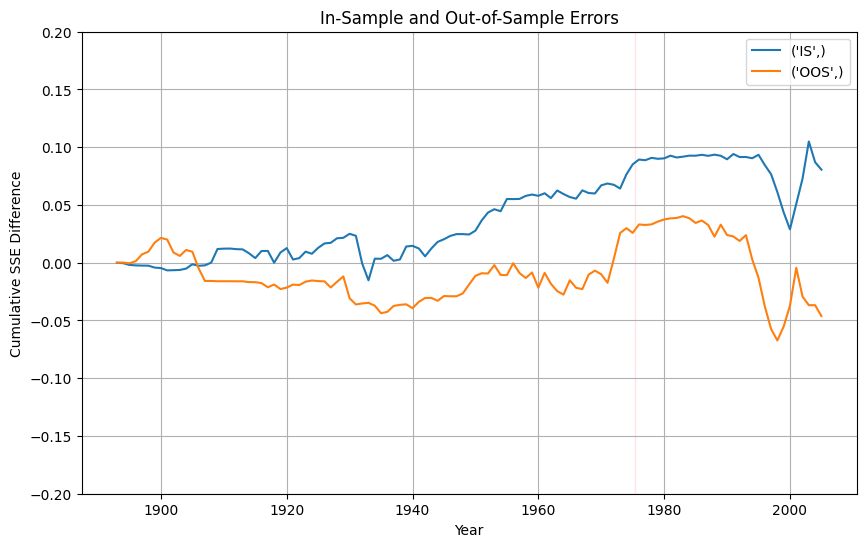

{'IS_error_N': yyyy
 1872-12-31    0.006672
 1873-12-31   -0.196954
 1874-12-31    0.000865
 1875-12-31   -0.063332
 1876-12-31   -0.207860
                 ...   
 2000-12-31   -0.199752
 2001-12-31   -0.208094
 2002-12-31   -0.312611
 2003-12-31    0.190900
 2004-12-31    0.039636
 Freq: A-DEC, Name: premium, Length: 133, dtype: float64,
 'IS_error_A': yyyy
 1872-12-31   -0.005438
 1873-12-31   -0.212818
 1874-12-31   -0.026511
 1875-12-31   -0.089381
 1876-12-31   -0.231080
                 ...   
 2000-12-31   -0.133905
 2001-12-31   -0.146278
 2002-12-31   -0.256075
 2003-12-31    0.233212
 2004-12-31    0.089667
 Freq: A-DEC, Length: 133, dtype: float64,
 'OOS_error_N': array([-5.55240414e-03,  1.45209248e-02, -3.35478431e-02,  1.24554583e-01,
         1.69851872e-01,  5.01012880e-02,  1.23449156e-01,  1.30698269e-01,
        -1.18825199e-02, -2.20098966e-01,  2.13388475e-01,  1.19950479e-01,
        -2.90224941e-03, -4.18322633e-01,  3.10463901e-01,  1.17490707e-01,
        -1.4

In [18]:
# Selecting the Dividend Price Ratio (d/p) as the independent variable, and the equity premium as the dependent variable.
df = df[["d/p", "premium"]]

# running the model
get_statistics(df, "d/p", "premium")